In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\vchan\Downloads\AI_Student.csv")
df

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating,Year,Month
0,SESSION00001,Undergraduate,Computer Science,03-11-2024,31.20,11,Studying,2,Assignment Completed,True,1.0,2024,11
1,SESSION00002,Undergraduate,Psychology,25-08-2024,13.09,6,Studying,3,Assignment Completed,True,2.0,2024,8
2,SESSION00003,Undergraduate,Business,12-01-2025,19.22,5,Coding,3,Assignment Completed,True,3.3,2025,1
3,SESSION00004,Undergraduate,Computer Science,06-05-2025,3.70,1,Coding,3,Assignment Completed,True,3.5,2025,5
4,SESSION00005,Undergraduate,Psychology,18-03-2025,28.12,9,Writing,3,Assignment Completed,True,2.9,2025,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,SESSION09996,Undergraduate,Psychology,20-07-2024,28.41,5,Studying,3,Assignment Completed,True,4.2,2024,7
9996,SESSION09997,High School,Business,11-11-2024,13.98,6,Writing,5,Assignment Completed,True,5.0,2024,11
9997,SESSION09998,Undergraduate,Biology,11-09-2024,10.78,2,Studying,3,Idea Drafted,True,3.5,2024,9
9998,SESSION09999,Undergraduate,Business,27-10-2024,30.88,7,Writing,3,Assignment Completed,False,4.3,2024,10


## 1. Students Based on their Level

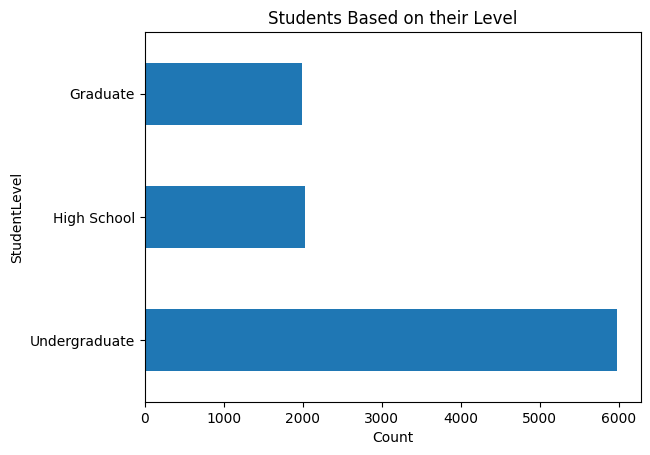

In [3]:
types_of_student = df['StudentLevel'].value_counts()
types_of_student.plot(kind='barh')
plt.title('Students Based on their Level')
plt.xlabel('Count')
plt.show()

## 2. Students Based on their Discpline

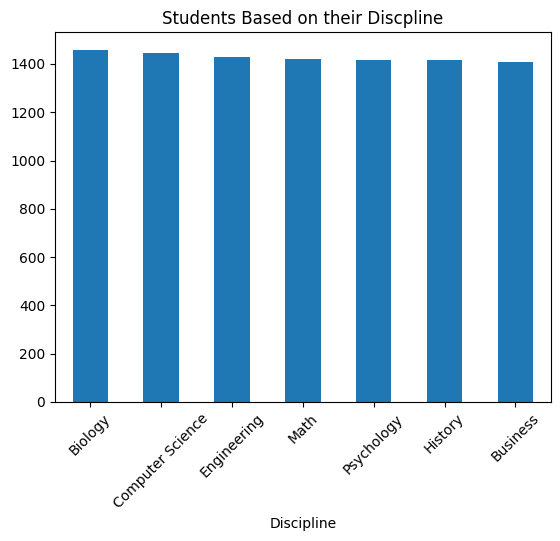

In [4]:
disciple_count = df['Discipline'].value_counts()
disciple_count.plot(kind='bar')
plt.title('Students Based on their Discpline')
plt.xlabel('Discipline')
plt.xticks(rotation=45)
plt.show()

## 3. Types of task Performed

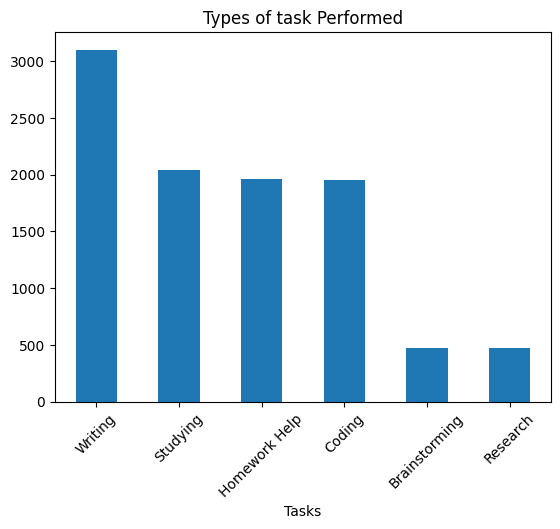

In [5]:
task_count = df['TaskType'].value_counts()
task_count.plot(kind='bar')
plt.title('Types of task Performed')
plt.xlabel('Tasks')
plt.xticks(rotation=45)
plt.show()

## 4. AI Probablity to Give Outcome

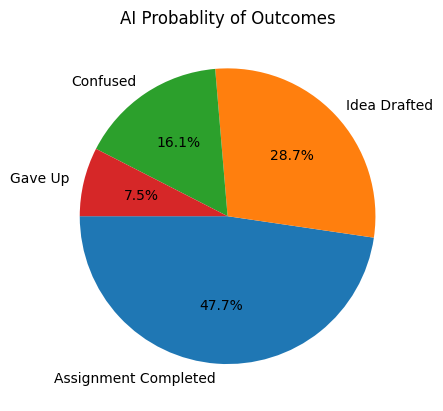

In [6]:
outcome = df['FinalOutcome'].value_counts()
outcome.plot(kind='pie',autopct="%1.1f%%",startangle=180)
plt.title('AI Probablity of Outcomes')
plt.ylabel("")
plt.show()

## 5. AI Reuse %

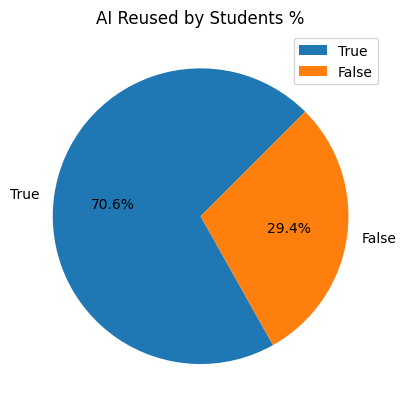

In [7]:
ai_reuse = df['UsedAgain'].value_counts()
ai_reuse.plot(kind='pie',autopct='%1.1f%%',startangle=45)
plt.title('AI Reused by Students %')
plt.ylabel("")
plt.legend()
plt.show()

## 6. Monthly Trend of AI Usage

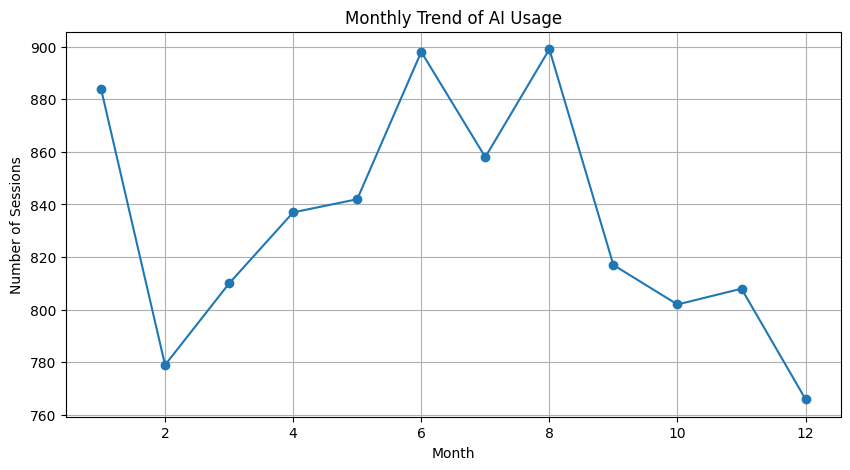

In [10]:
month_use = df['Month'].value_counts().sort_index()
plt.figure(figsize=(10,5))
plt.plot(month_use.index, month_use.values, marker='o')
plt.title('Monthly Trend of AI Usage')
plt.xlabel('Month')
plt.ylabel('Number of Sessions')
plt.grid(True)
plt.show()


## 7. Use of AI within Years

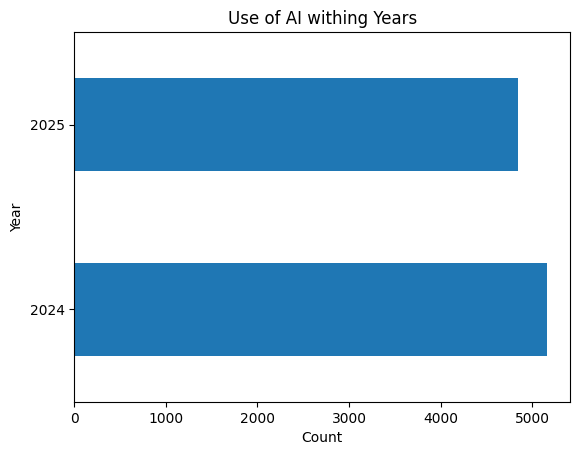

In [11]:
ai_during_year = df['Year'].value_counts()
ai_during_year.plot(kind='barh')
plt.title('Use of AI withing Years')
plt.ylabel('Year')
plt.xlabel('Count')
plt.show()

## 8. Average Session Length and Prompts by Student Level

In [12]:
df_level = (df.groupby('StudentLevel').agg(avg_session_length=('SessionLengthMin', 'mean'),avg_prompts=('TotalPrompts', 'mean')).reset_index())
df_level


,StudentLevel,avg_session_length,avg_prompts
0,Graduate,20.252236,5.787469
1,High School,20.023740,5.619142
2,Undergraduate,19.650943,5.543493


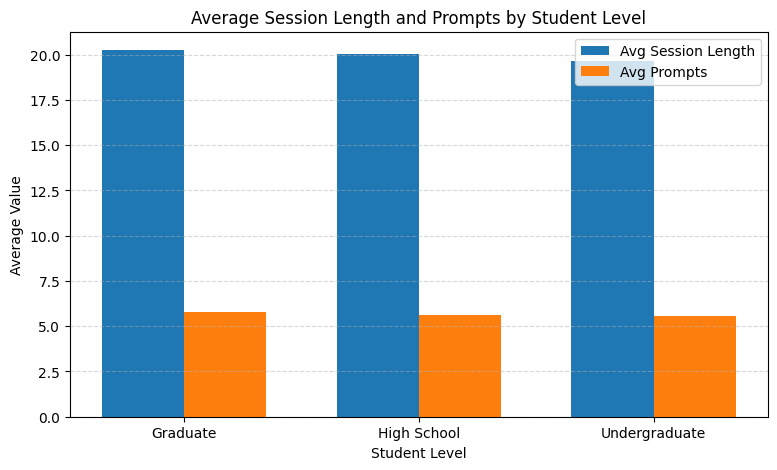

In [14]:
import numpy as np
x = np.arange(len(df_level['StudentLevel']))
width = 0.35
plt.figure(figsize=(9,5))
plt.bar(x - width/2, df_level['avg_session_length'],width, label='Avg Session Length')
plt.bar(x + width/2, df_level['avg_prompts'],width, label='Avg Prompts')

plt.xticks(x, df_level['StudentLevel'])
plt.xlabel('Student Level')
plt.ylabel('Average Value')
plt.title('Average Session Length and Prompts by Student Level')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


## 9. Average Session Length and Prompts by Discipline

In [15]:
dfs_level = (df.groupby('Discipline').agg(avg_session_length=('SessionLengthMin', 'mean'),avg_prompts=('TotalPrompts', 'mean')).reset_index())
dfs_level


,Discipline,avg_session_length,avg_prompts
0,Biology,19.944959,5.657064
1,Business,19.884645,5.551064
2,Computer Science,19.679170,5.571626
3,Engineering,20.143937,5.639161
4,History,19.762816,5.657728
5,Math,19.605113,5.534459
6,Psychology,19.903357,5.640339


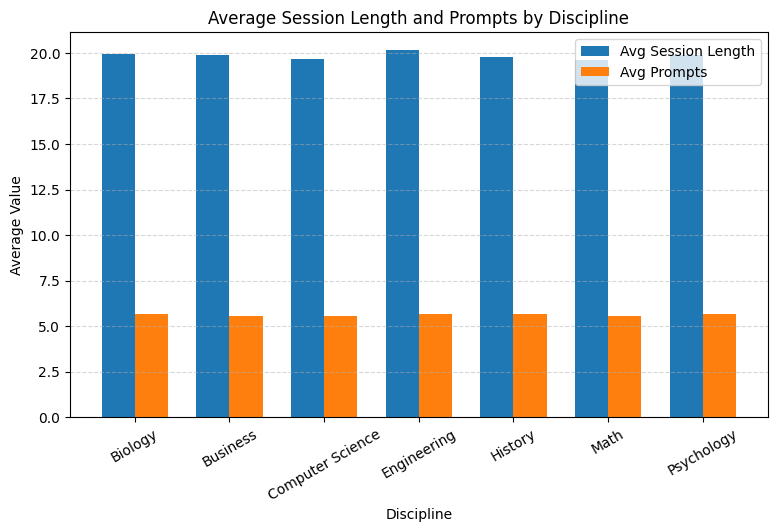

In [16]:
x = np.arange(len(dfs_level['Discipline']))
plt.figure(figsize=(9,5))
plt.bar(x - width/2, dfs_level['avg_session_length'],width, label='Avg Session Length')
plt.bar(x + width/2, dfs_level['avg_prompts'],width, label='Avg Prompts')

plt.xticks(x, dfs_level['Discipline'],rotation=30)
plt.xlabel('Discipline')
plt.ylabel('Average Value')
plt.title('Average Session Length and Prompts by Discipline')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


## 10. Session Length vs Total Prompts

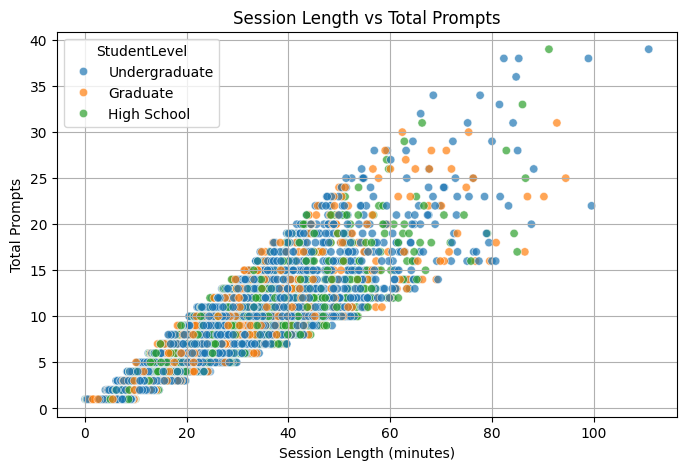

In [17]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df,x='SessionLengthMin',y='TotalPrompts',hue='StudentLevel',alpha=0.7)
plt.title('Session Length vs Total Prompts')
plt.xlabel('Session Length (minutes)')
plt.ylabel('Total Prompts')
plt.grid(True)
plt.show()

## 11. Uses of AI Models

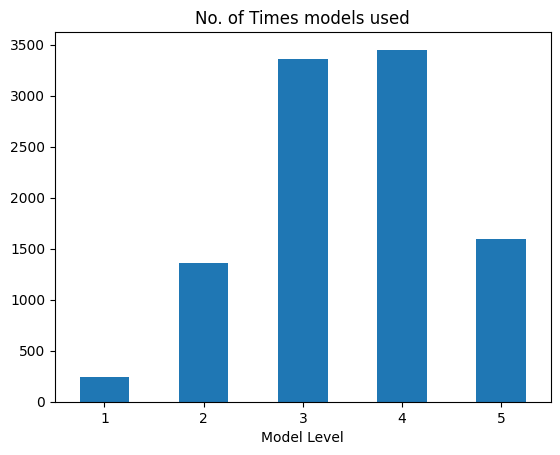

In [28]:
ai_level = df['AI_AssistanceLevel'].value_counts().sort_index()
ai_level.plot(kind='bar')
plt.title('No. of Times models used')
plt.xlabel('Model Level')
plt.xticks(rotation = 360)
plt.show()

## 12. Avg Session Length vs Satisfaction

In [33]:
df['rating_group'] = pd.cut(df['SatisfactionRating'],bins=[1,2,3,4,5],labels=['1-2','2-3','3-4','4-5'])


In [34]:
df_rating = df.groupby('rating_group')['SessionLengthMin'].mean()


C:\Users\vchan\AppData\Local\Temp\ipykernel_21652\2197694277.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_rating = df.groupby('rating_group')['SessionLengthMin'].mean()


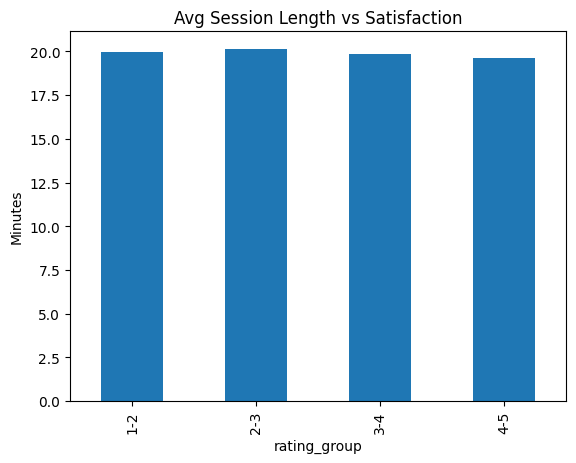

In [35]:
df_rating.plot(kind='bar', title='Avg Session Length vs Satisfaction')
plt.ylabel('Minutes')
plt.show()


## 13. Heatmap

In [38]:
heat = df[['SessionLengthMin','TotalPrompts','SatisfactionRating']]
heat_cor = heat.corr()

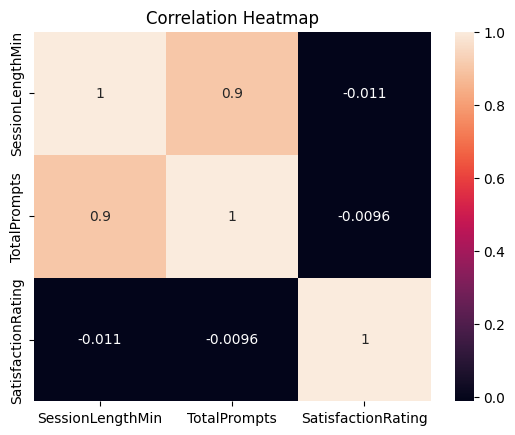

In [39]:
sns.heatmap(heat_cor, annot=True)
plt.title('Correlation Heatmap')
plt.show()

## 14. AI Assistance Level Usage by Student Level

In [44]:
df_level = (df.groupby(['StudentLevel', 'AI_AssistanceLevel']).size().reset_index(name='count'))

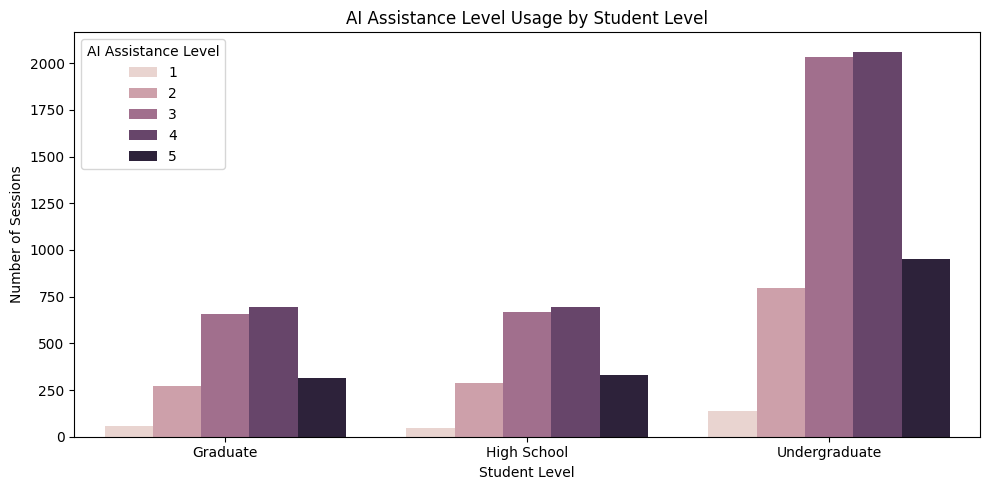

In [45]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_level,x='StudentLevel',y='count',hue='AI_AssistanceLevel')

plt.title('AI Assistance Level Usage by Student Level')
plt.xlabel('Student Level')
plt.ylabel('Number of Sessions')
plt.legend(title='AI Assistance Level')
plt.tight_layout()
plt.show()


## 15. Distribution of Session Length among Students

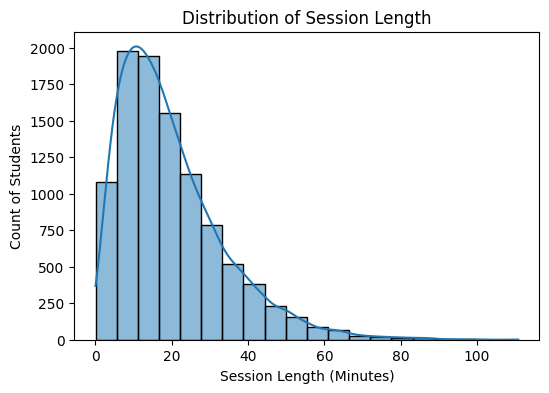

In [47]:
plt.figure(figsize=(6,4))
sns.histplot(df['SessionLengthMin'],bins=20,kde=True)

plt.title('Distribution of Session Length')
plt.xlabel('Session Length (Minutes)')
plt.ylabel('Count of Students')
plt.show()

## 16. Session Length Distribution by Reuse Behavior

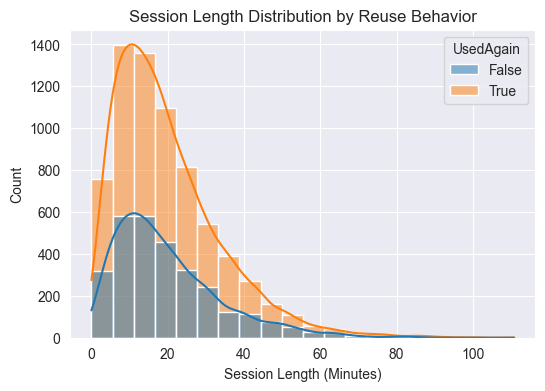

In [48]:
sns.set_style('darkgrid')

plt.figure(figsize=(6,4))
sns.histplot(
    data=df,
    x='SessionLengthMin',
    hue='UsedAgain',
    bins=20,
    kde=True,
    multiple='layer'
)

plt.title('Session Length Distribution by Reuse Behavior')
plt.xlabel('Session Length (Minutes)')
plt.ylabel('Count')
plt.show()

## 16. Satisfaction Rating Distribution by Reuse

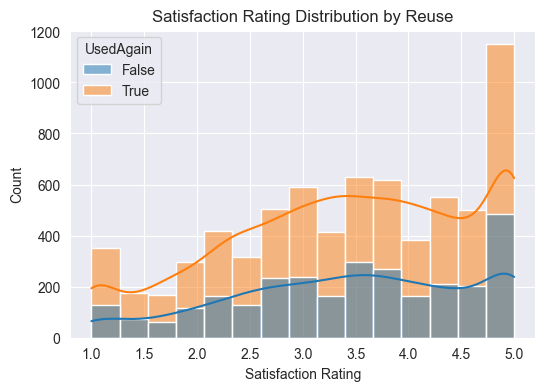

In [49]:
plt.figure(figsize=(6,4))
sns.histplot(
    data=df,
    x='SatisfactionRating',
    hue='UsedAgain',
    bins=15,
    kde=True,
    multiple='layer'
)

plt.title('Satisfaction Rating Distribution by Reuse')
plt.xlabel('Satisfaction Rating')
plt.ylabel('Count')
plt.show()

## 17. Session Length Distribution by Task Type

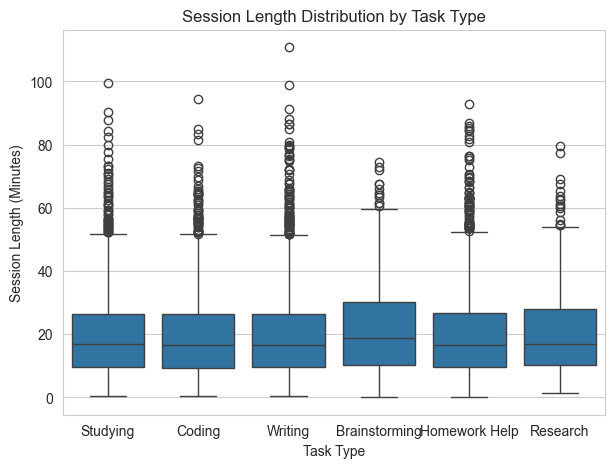

In [51]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df,x='TaskType',y='SessionLengthMin')

plt.title('Session Length Distribution by Task Type')
plt.xlabel('Task Type')
plt.ylabel('Session Length (Minutes)')
plt.show()